In [2]:
%matplotlib inline

import pickle
import matplotlib.pyplot as plt
import matplotlib
import mpld3, mpld3.plugins
import numpy as np
from collections import Counter
import pandas as pd
import seaborn

plt.rcParams['figure.figsize'] = (15, 5)

In [5]:
runners = pickle.load(open("results/2013/results.pkl", 'rb'))

In [6]:
runners["1"]

{'10k': '0:30:54',
 'name': 'Korir, Wesley',
 'division': '5',
 '25k': '1:17:16',
 'gender': 'M',
 'age': '30',
 'official': '2:12:30',
 'bib': '1',
 'genderdiv': '5',
 'ctz': '',
 '35k': '1:48:47',
 'overall': '5',
 'pace': '0:05:04',
 'state': '',
 '30k': '1:32:58',
 '5k': '0:15:54',
 'half': '1:04:54',
 '20k': '1:01:31',
 'country': 'KEN',
 'city': 'Kenya',
 '40k': '2:04:46'}

In [11]:
def bar(xs, ys):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.grid(color='white', linestyle='solid')
    ax.bar(xs, ys, fc='lightblue', alpha=0.8, edgecolor="white")

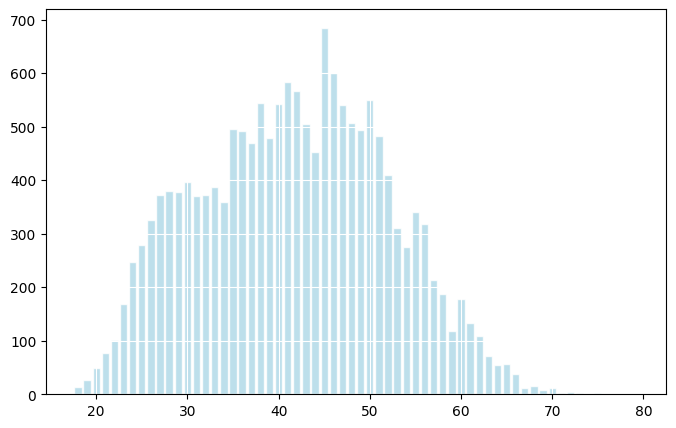

In [12]:
ages = Counter(int(x['age']) for x in runners.values())
xs = range(min(ages.keys()), max(ages.keys()))
ys = [ages[i] for i in xs]
bar(xs, ys)

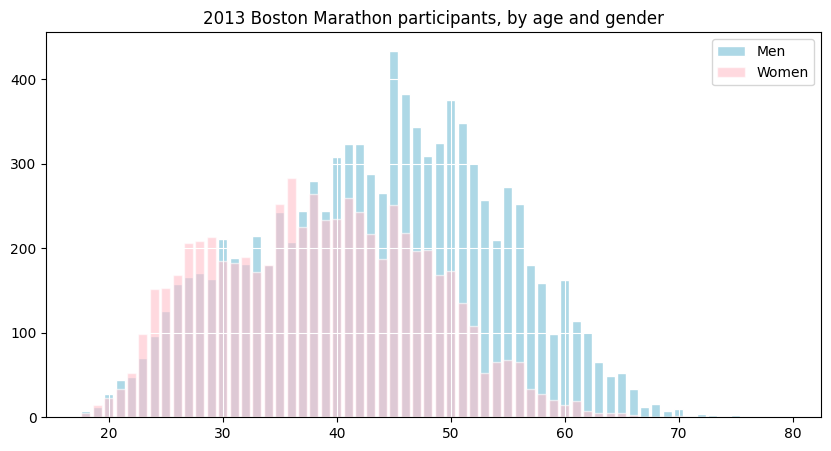

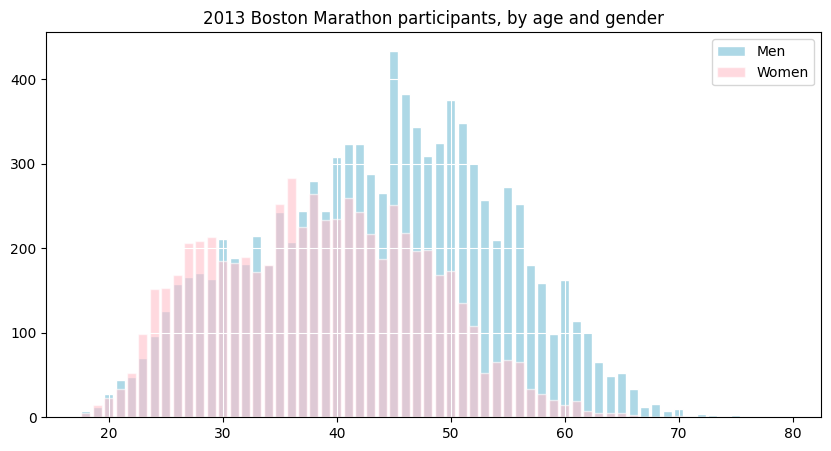

In [15]:
from collections import Counter
men = Counter(int(x['age']) for x in runners.values() if x['gender']=="M")
mxs = range(min(men.keys()), max(men.keys()))
mys = [men[i] for i in mxs]

wmn = Counter(int(x['age']) for x in runners.values() if x['gender']=="F")
wxs = range(min(wmn.keys()), max(wmn.keys()))
wys = [wmn[i] for i in wxs]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, title="2013 Boston Marathon participants, by age and gender")
ax.grid(color='white', linestyle='solid')
b1 = ax.bar(mxs, mys, color='lightblue', alpha=1, edgecolor="white", label="Men")
b2 = ax.bar(wxs, wys, color='pink', alpha=0.6, edgecolor="white", label="Women")
ax.legend()

fig

In [22]:
from collections import Counter
men = Counter(minutes(x) for x in runners.values() if x['gender']=="M")
mxs = range(min(men.keys()), max(men.keys()))
mys = [men[i] for i in mxs]

wmn = Counter(minutes(x) for x in runners.values() if x['gender']=="F")
wxs = range(min(wmn.keys()), max(wmn.keys()))
wys = [wmn[i] for i in wxs]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, title="2013 Boston Marathon participants, by age and gender")
ax.grid(color='white', linestyle='solid')
b1 = ax.bar(mxs, mys, color='lightblue', alpha=1, edgecolor="white", label="Men")
b2 = ax.bar(wxs, wys, color='pink', alpha=0.6, edgecolor="white", label="Women")
ax.legend()

fig

KeyError: 105

In [20]:
def minutes(time):
    parts = [int(x) for x in runners[105]['official'].split(':')]
    return parts[0] * 60 + parts[1] + parts[2]/60.

In [18]:
r2014 = pickle.load(open("results/2014/results.pkl", 'rb'))

In [ ]:
len(r2014)

In [ ]:
r2014["30592"]

In [16]:
from collections import Counter
men = Counter(int(x['official']) for x in r2014.itervalues() if x['gender']=="M")
mxs = range(min(men.keys()), max(men.keys()))
mys = [men[i] for i in mxs]

wmn = Counter(int(x['official']) for x in r2014.itervalues() if x['gender']=="F")
wxs = range(min(wmn.keys()), max(wmn.keys()))
wys = [wmn[i] for i in wxs]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, axisbg='#EEEEEE', title="2014 Boston Marathon participants, by age and gender")
ax.grid(color='white', linestyle='solid')
b1 = ax.bar(mxs, mys, color='lightblue', alpha=1, edgecolor="white", label="Men")
b2 = ax.bar(wxs, wys, color='pink', alpha=0.6, edgecolor="white", label="Women")
ax.legend()

mpld3.display()

NameError: name 'r2014' is not defined

In [ ]:
df = pd.read_csv("results/2014/results.csv")

In [ ]:
df.head(10)

In [ ]:
df.describe()

In [ ]:
df['official'].groupby(pd.cut(df['age'], range(15,90,5))).aggregate(np.average).plot(kind="bar", title="Average time by age group")

In [ ]:
df['official'].groupby(pd.cut(df['age'], range(15,90,5))).aggregate(len).plot(kind="bar", title="# of runners by age group")

In [ ]:
#Q: What's the distribution of finish times *within* an age group... small multiples
agegroups = range(15,90,5)
agebins = pd.cut(df['age'], agegroups,
                 labels=['{}-{}'.format(age,age+5) for age in agegroups][:-1])
times = range(80, 530, 50)
timebins = pd.cut(df['official'], times,
                  labels=['{}-{}'.format(t, t+50) for t in times][:-1])
age_and_time = df['official'].groupby([agebins, timebins]).aggregate(len)
#age_and_time = age_and_time.to_frame()
age_and_time.plot(kind="bar")
age_and_time.index.get_level_values(0)
#age_and_time["(15, 20]"]
#x = [age_and_time[ax] for ax in age_and_time.axes[0].levels[0]]
#x[0].values

In [ ]:
pd.cut?

In [ ]:
years = []
for year in range(2001, 2015):
    y = pd.read_csv("results/{}/results.csv".format(year), na_values="-")[["official", "gender", "age"]]
    y["year"] = str(year)
    years.append(y)
alltimes = pd.concat(years, ignore_index=True).dropna()

In [ ]:
plt.figure()
alltimes.boxplot(column='official', by='year')

In [ ]:
seaborn.set(context = 'notebook', style = 'darkgrid')
# not sure how to do this non-globally?
seaborn.set_context(rc={"figure.figsize": (15, 10)})

f, ax1 = plt.subplots(1)
ax1.set_title("Boston Marathon times 2001-2014")
seaborn.boxplot(pd.Series(alltimes.loc[:, "official"], name="Time in minutes"), groupby=alltimes.year)

In [ ]:
f, ax1 = plt.subplots(1)
ax1.set_title("Boston Marathon times 2001-2014")
seaborn.violinplot(pd.Series(alltimes.loc[:, "official"], name="time in minutes"), groupby=alltimes.year, ax=ax1)

In [ ]:
f, ax1 = plt.subplots(1)
ax1.set_title("Boston Marathon times 2001-2014 by gender")
seaborn.violinplot(pd.Series(alltimes.loc[:, "official"], name="time in minutes"), groupby=[alltimes.year, alltimes.gender], ax=ax1)

In [ ]:
# wow that is a hideous, useless plot. Looks like women finish a predictable amount worse than men every year?
# I wonder how, across all years, age groups do. (That one might benefit from a gender split, more than the above)
# Also TODO: a map of the states & countries of Boston Marathon participants

alltimes
agegroups = range(15,90,5)
agebins = pd.cut(alltimes['age'], agegroups,
                 labels=['{}-{}'.format(age,age+5) for age in agegroups][:-1])

f, ax1 = plt.subplots(1)
ax1.set_title("Boston Marathon times 2001-2014 by age group")
seaborn.violinplot(pd.Series(alltimes.loc[:, "official"], name="time in minutes"), groupby=agebins, ax=ax1)

In [ ]:
# wow that is a hideous, useless plot. Looks like women finish a predictable amount worse than men every year?
# I wonder how, across all years, age groups do. (That one might benefit from a gender split, more than the above)
# Also TODO: a map of the states & countries of Boston Marathon participants

alltimes
agegroups = range(15,90,5)
agebins = pd.cut(alltimes['age'], agegroups,
                 labels=['{}-{}'.format(age,age+5) for age in agegroups][:-1])

f, ax1 = plt.subplots(1)
ax1.set_title("Boston Marathon times 2001-2014 by age group")
seaborn.boxplot(pd.Series(alltimes.loc[:, "official"], name="time in minutes"), groupby=agebins, ax=ax1)

### # wow that is a hideous, useless plot. Looks like women finish a predictable amount worse than men every year? # I wonder how, across all years, age groups do. (That one might benefit from a gender split, more than the above) # Also TODO: a map of the states & countries of Boston Marathon participants  alltimes agegroups = range(15,90,5) agebins = pd.cut(alltimes['age'], agegroups,                  labels=['{}-{}'.format(age,age+5) for age in agegroups][:-1])  f, ax1 = plt.subplots(1) ax1.set_title("Boston Marathon times 2001-2014 by age group") seaborn.violinplot(pd.Series(alltimes.loc[:, "official"], name="time in minutes"), groupby=[alltimes.gender, agebins], ax=ax1) g = alltimes.groupby([agebins, alltimes.gender]) g.head()

In [ ]:
years = []
for year in range(2001, 2015):
    y = pd.read_csv("results/{}/results.csv".format(year), na_values="-")[["state"]]
    years.append(y)
states = pd.concat(years, ignore_index=True).dropna()
g = states.groupby("state") #.aggregate(len)
h = g.count()


In [ ]:
import json
json.dumps(h.to_dict()['state'])

In [ ]:
dict(sorted(h.to_dict().iteritems()))

In [ ]:
years = []
for year in range(2001, 2015):
    y = pd.read_csv("results/{}/results.csv".format(year), na_values="-")[["country"]]
    years.append(y)
states = pd.concat(years, ignore_index=True).dropna()
g = states.groupby("country") #.aggregate(len)
h = g.count()

In [ ]:
json.dumps(h.to_dict()['country'])